In [1]:
cd "Documents/Kaggle/Home Credit Default Risk"

C:\Users\amitachra\Documents\Kaggle\Home Credit Default Risk


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
application_train = pd.read_csv("application_train.csv")

In [4]:
application_train.shape

(307511, 122)

In [111]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_ALL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [112]:
application_test = pd.read_csv("application_test.csv")

In [113]:
application_test.shape

(48744, 121)

In [114]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#summary_stats_app_train = application_train.describe()
#summary_stats_app_train.to_csv("summary_stats_app_train.csv")

In [6]:
null_values = pd.DataFrame(application_train.isna().sum(), index=application_train.columns, columns=["null_count"])
n_rows = application_train.apply(len).max()

In [7]:
null_values["%_Null"] = null_values.apply(lambda x: x/n_rows)

In [15]:
null_values.sort_values(by = "null_count",ascending=False).head(3)

,null_count,%_Null
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723


In [13]:
#Removing columns in training data - columns with high NUll values (>40% missing values)

drop_columns = null_values[null_values["%_Null"] > 0.4].index
application_train.drop(drop_columns,axis=1,inplace=True)
application_train.shape

(307511, 73)

In [115]:
#Removing columns in test data - columns with high NUll values in training data

application_test.drop(drop_columns,axis=1,inplace=True)
application_test.shape

(48744, 72)

In [128]:
application_test.select_dtypes(include="object").isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [136]:
app_test_num_nulls = application_test.select_dtypes(exclude="object").isnull().sum()
app_test_num_nulls

SK_ID_CURR                        0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      24
AMT_GOODS_PRICE                   0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
EXT_SOURCE_2                

# Dimension Reduction

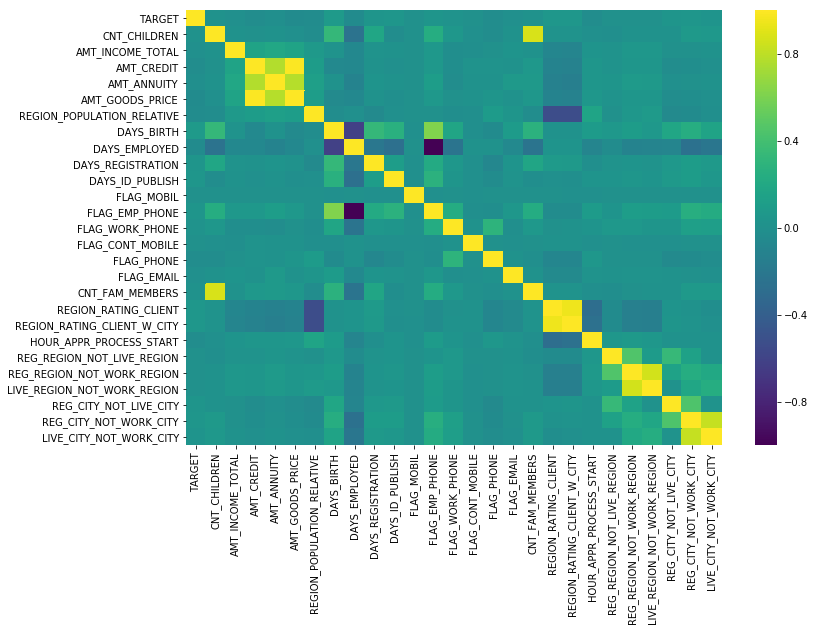

In [118]:
plt.figure(figsize=(12,8))
sns.heatmap(application_train.iloc[:,1:40].corr(),cmap="viridis")

In [122]:
# Missing Value Imputation for Categorical Variables: 

cat_vars_names = application_train.select_dtypes(include="object").columns
application_train[cat_vars_names] = application_train[cat_vars_names].fillna(value="missing")
application_test[cat_vars_names] = application_test[cat_vars_names].fillna(value="missing")

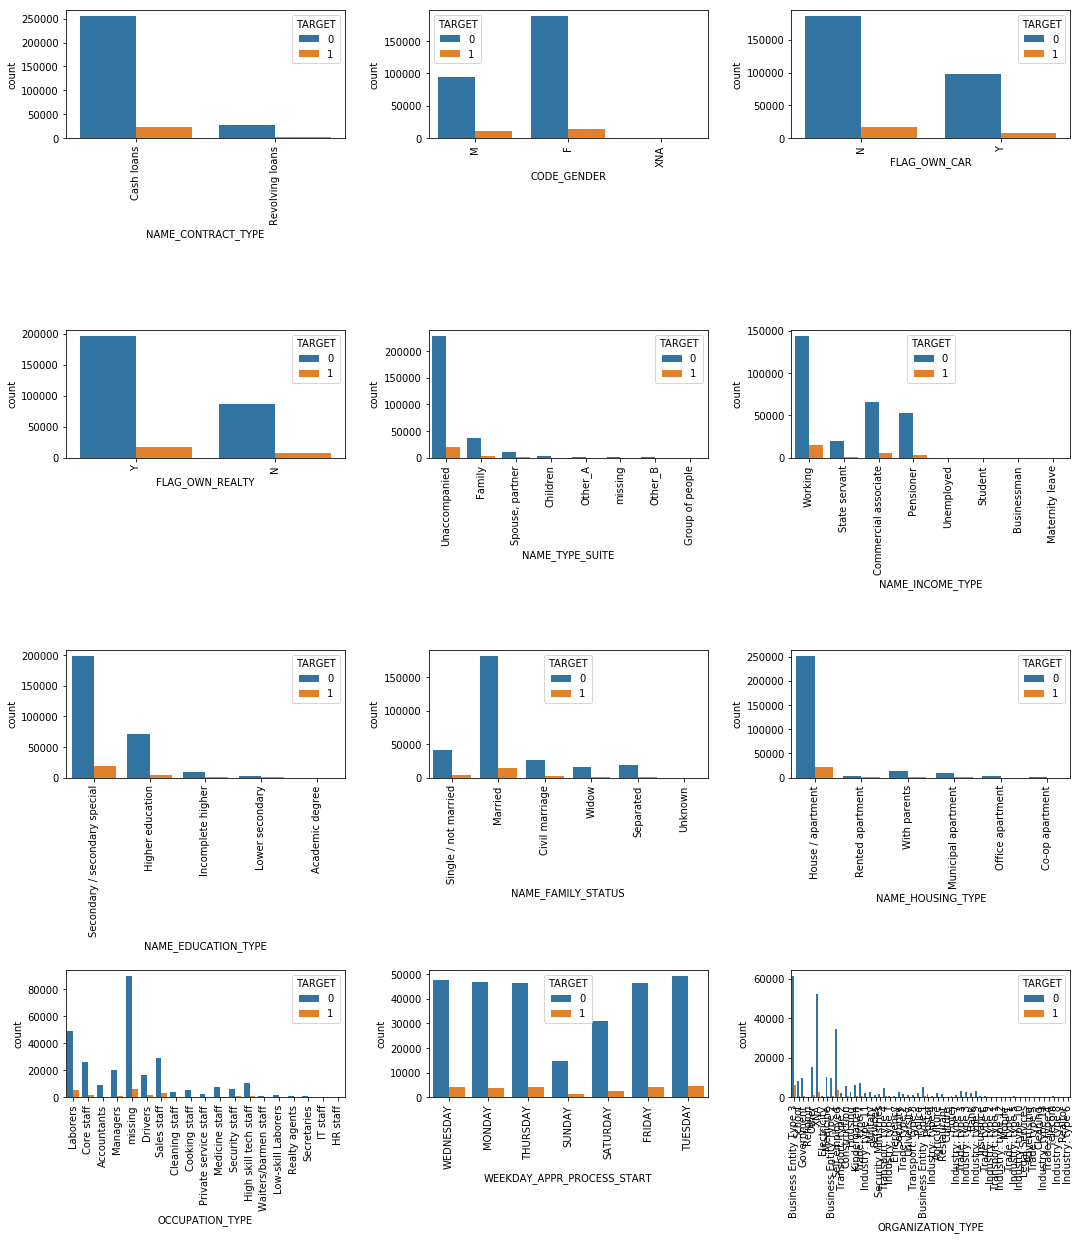

In [50]:
i=1
plt.figure(figsize=(18,20))
plt.subplots_adjust(hspace=1.5,wspace=0.3)
for cat in cat_vars_names:
    plt.subplot(4,3,i)
    sns.countplot(x=cat,hue="TARGET", data = application_train)
    plt.xlabel(cat)
    plt.xticks(rotation="vertical")
    i=i+1
    plt.tight_layout


# Feature Selection: SelectKBest using Chi-Square Test


In [110]:
from sklearn.feature_selection import SelectKBest,chi2

In [58]:
application_train["EXT_SOURCE_3"].nunique()

814

In [59]:
application_train["EXT_SOURCE_3"].value_counts().head()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
Name: EXT_SOURCE_3, dtype: int64

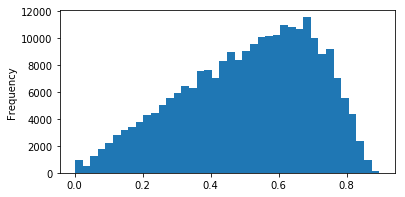

In [70]:
plt.figure(figsize=(6,3))
application_train["EXT_SOURCE_3"].plot.hist(bins=40)
plt.show()

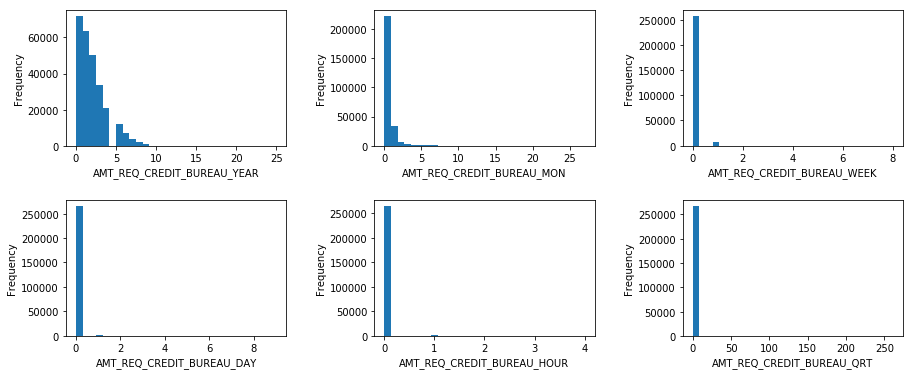

In [284]:
num_6 = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_QRT"]
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,7):
    plt.subplot(2,3,i)
    application_train[num_6[i-1]].plot.hist(bins=30)
    plt.xlabel(num_6[i-1])
    plt.tight_layout

In [69]:
application_train["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts().head()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

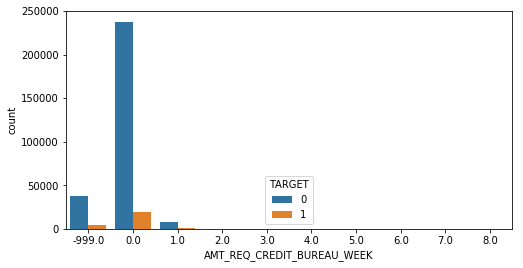

In [71]:
plt.figure(figsize=(8,4))
sns.countplot(x="AMT_REQ_CREDIT_BUREAU_WEEK", hue="TARGET", data=application_train.fillna(value=-999))
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

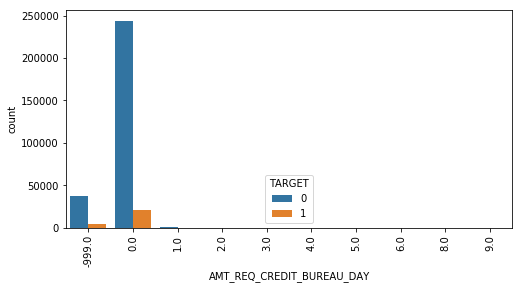

In [289]:
plt.figure(figsize=(8,4))
sns.countplot(x="AMT_REQ_CREDIT_BUREAU_DAY", hue="TARGET", data=application_train.fillna(value=-999))
plt.xticks(rotation="vertical")

In [290]:
application_train["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts().head()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [291]:
application_train["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts().head()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

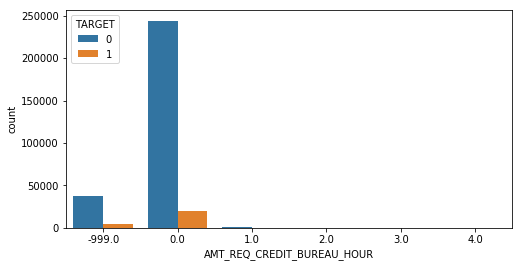

In [72]:
plt.figure(figsize=(8,4))
sns.countplot(x="AMT_REQ_CREDIT_BUREAU_HOUR", hue="TARGET", data=application_train.fillna(value=-999))

In [293]:
application_train["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts().head()

0.0    215417
1.0     33862
2.0     14412
3.0      1717
4.0       476
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

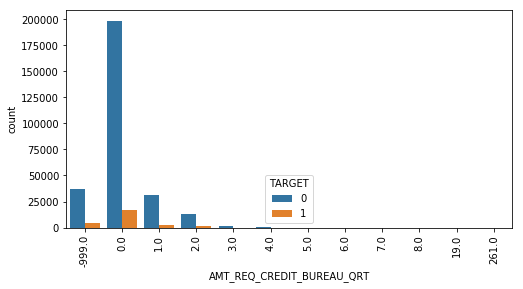

In [294]:
plt.figure(figsize=(8,4))
sns.countplot(x="AMT_REQ_CREDIT_BUREAU_QRT", hue="TARGET", data=application_train.fillna(value=-999))
plt.xticks(rotation="vertical")

In [295]:
application_train["AMT_REQ_CREDIT_BUREAU_MON"].value_counts().head()

0.0    222233
1.0     33147
2.0      5386
3.0      1991
4.0      1076
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

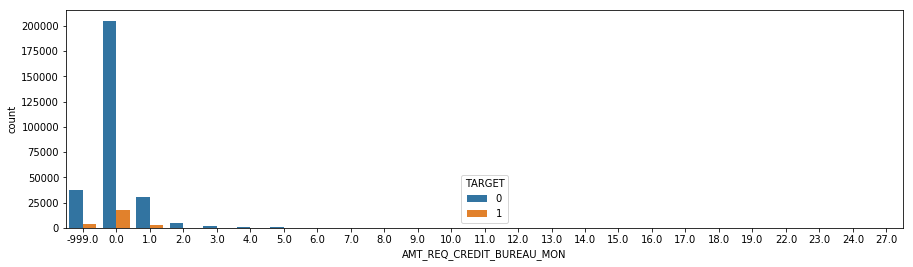

In [73]:
plt.figure(figsize=(15,4))
sns.countplot(x="AMT_REQ_CREDIT_BUREAU_MON", hue="TARGET", data=application_train.fillna(value=-999))
plt.show()

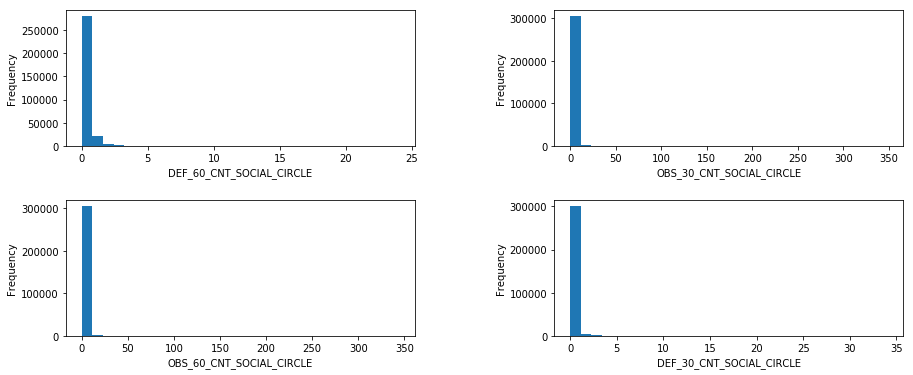

In [300]:
num2_4 = ["DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE"]
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,5):
    plt.subplot(2,2,i)
    application_train[num2_4[i-1]].plot.hist(bins=30)
    plt.xlabel(num2_4[i-1])
    plt.tight_layout

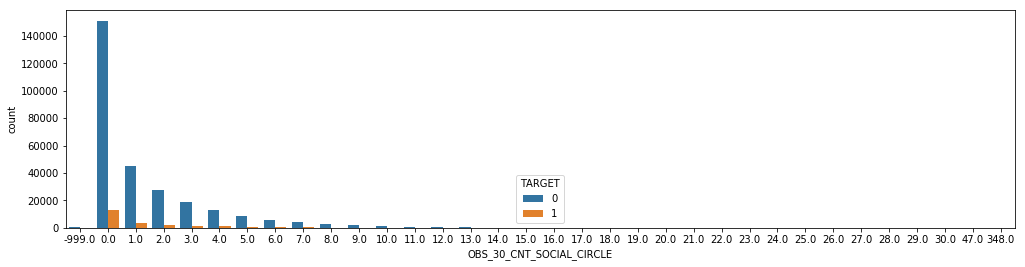

In [76]:
plt.figure(figsize=(17,4))
sns.countplot(x="OBS_30_CNT_SOCIAL_CIRCLE", hue="TARGET", data=application_train.fillna(value=-999))
plt.show()

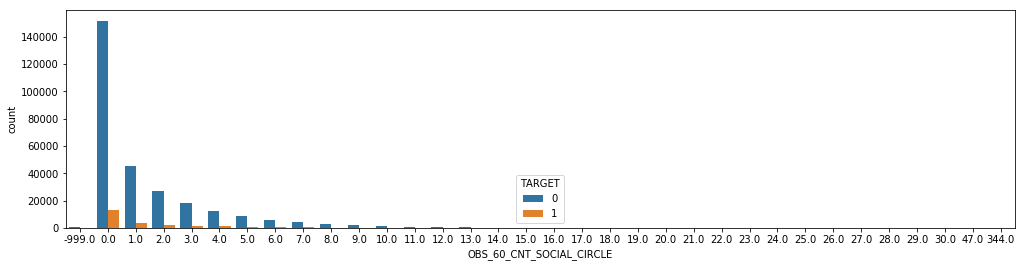

In [77]:
plt.figure(figsize=(17,4))
sns.countplot(x="OBS_60_CNT_SOCIAL_CIRCLE", hue="TARGET", data=application_train.fillna(value=-999))
plt.show()

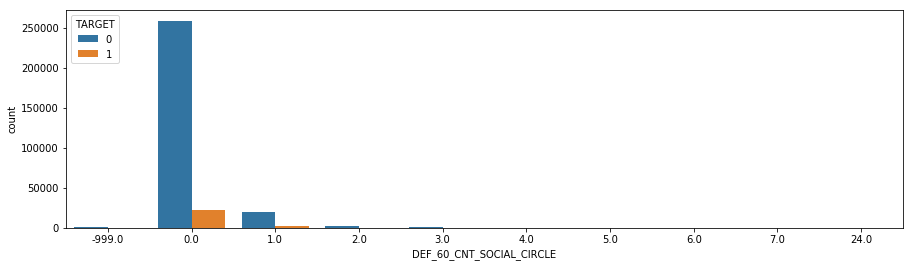

In [79]:
plt.figure(figsize=(15,4))
sns.countplot(x="DEF_60_CNT_SOCIAL_CIRCLE", hue="TARGET", data=application_train.fillna(value=-999))
plt.show()

In [313]:
application_train[application_train["OBS_30_CNT_SOCIAL_CIRCLE"] == application_train["OBS_60_CNT_SOCIAL_CIRCLE"]]["TARGET"].count()

301448

In [74]:
application_train[["TARGET","OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]].corr()

,TARGET,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
TARGET,1.000000,0.009131,0.009022,0.032248,0.031276
OBS_30_CNT_SOCIAL_CIRCLE,0.009131,1.000000,0.998490,0.329338,0.253499
OBS_60_CNT_SOCIAL_CIRCLE,0.009022,0.998490,1.000000,0.331571,0.255570
DEF_30_CNT_SOCIAL_CIRCLE,0.032248,0.329338,0.331571,1.000000,0.860517
DEF_60_CNT_SOCIAL_CIRCLE,0.031276,0.253499,0.255570,0.860517,1.000000


In [330]:
application_train["EXT_SOURCE_2"].nunique()

119831

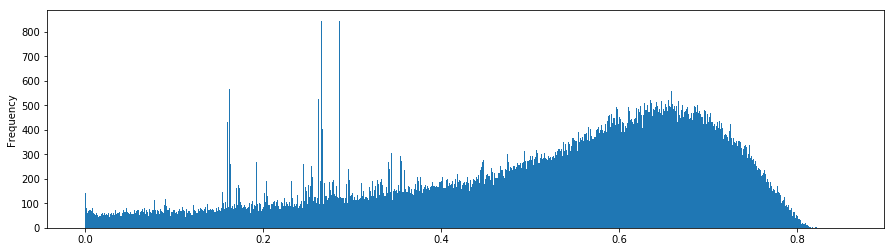

In [339]:
plt.figure(figsize=(15,4))
application_train["EXT_SOURCE_2"].plot.hist(bins=1500)

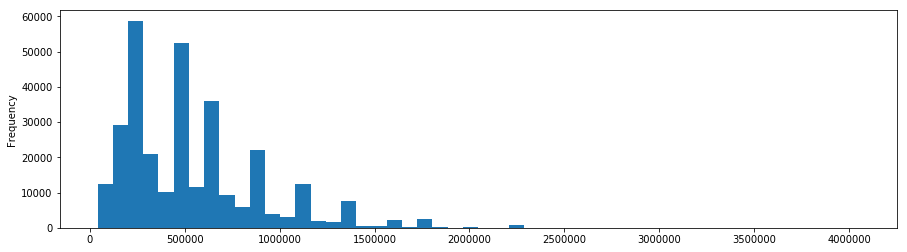

In [342]:
plt.figure(figsize=(15,4))
application_train["AMT_GOODS_PRICE"].plot.hist(bins=50)

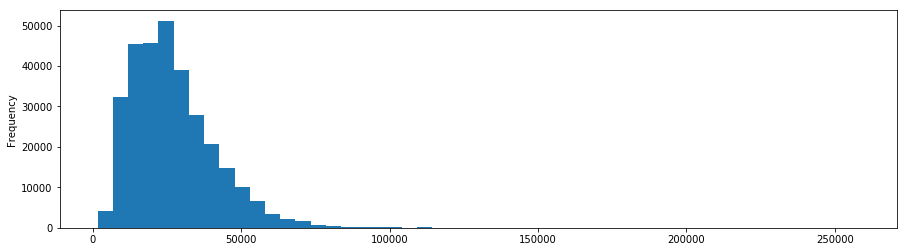

In [80]:
plt.figure(figsize=(15,4))
application_train["AMT_ANNUITY"].plot.hist(bins=50)

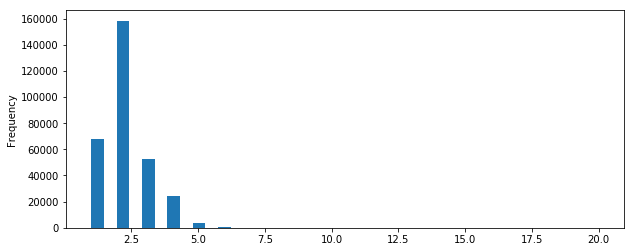

In [82]:
plt.figure(figsize=(10,4))
application_train["CNT_FAM_MEMBERS"].plot.hist(bins=40)

In [352]:
application_train["CNT_FAM_MEMBERS"].value_counts().head()

2.0    158357
1.0     67847
3.0     52601
4.0     24697
5.0      3478
Name: CNT_FAM_MEMBERS, dtype: int64

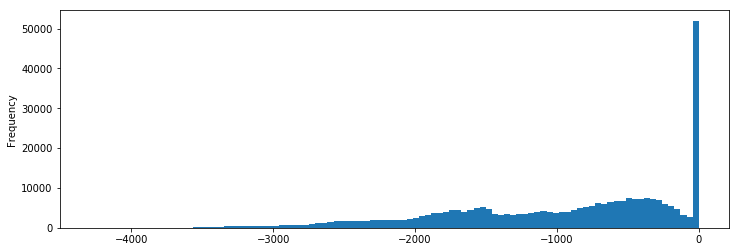

In [84]:
plt.figure(figsize=(12,4))
application_train["DAYS_LAST_PHONE_CHANGE"].plot.hist(bins=100)

In [354]:
application_train["DAYS_LAST_PHONE_CHANGE"].value_counts().head()

 0.0    37672
-1.0     2812
-2.0     2318
-3.0     1763
-4.0     1285
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [356]:
application_train["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

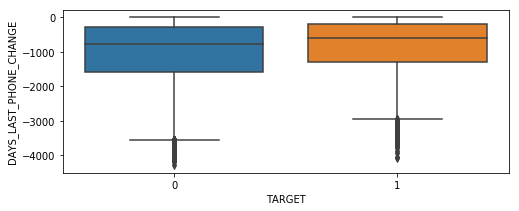

In [85]:
plt.figure(figsize=(8,3))
sns.boxplot(y="DAYS_LAST_PHONE_CHANGE", x="TARGET", data=application_train)
plt.show()

In [86]:
application_train.shape

(307511, 73)

In [87]:
#df_null_rem["Null_Per"] = df_null_rem["Null Count"].apply(lambda x: x/df_len)

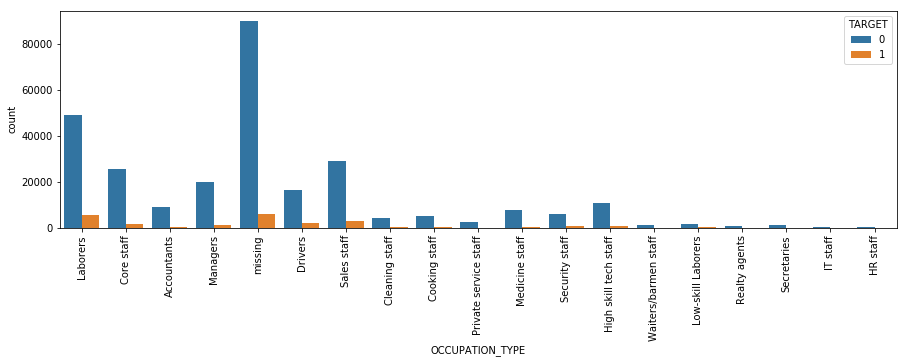

In [90]:
plt.figure(figsize=(15,4))
sns.countplot(x="OCCUPATION_TYPE", hue="TARGET", data=application_train)
plt.xticks(rotation="vertical")
plt.show()

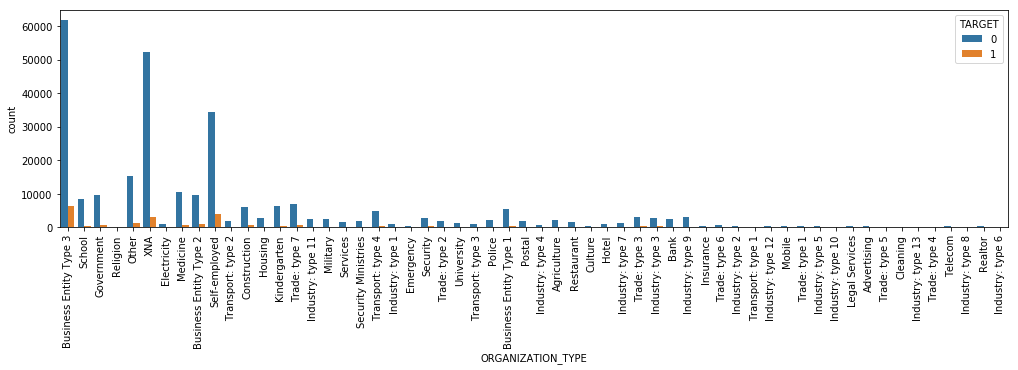

In [93]:
plt.figure(figsize=(17,4))
sns.countplot(x="ORGANIZATION_TYPE", hue="TARGET", data=application_train)
plt.xticks(rotation="vertical")
plt.show()

In [94]:
flag_document_20 = []
for num in range(2,22):
    flag_document_20.append("FLAG_DOCUMENT_%d"%num)

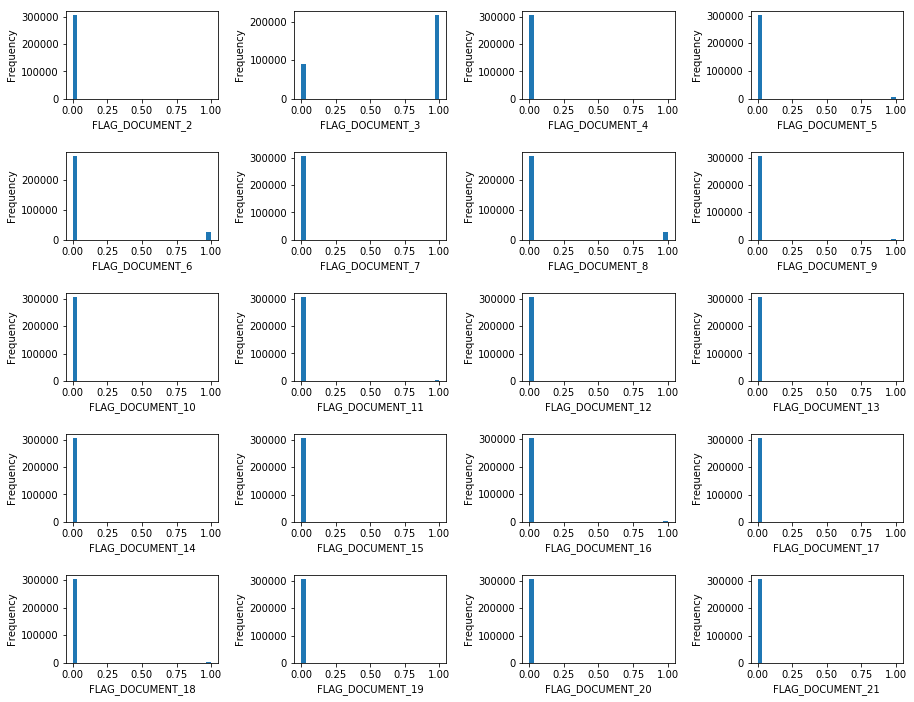

In [99]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.6,wspace=0.5)
for i in range(1,21):
    plt.subplot(5,4,i)
    application_train[flag_document_20[i-1]].plot.hist(bins=30)
    plt.xlabel(flag_document_20[i-1])
    plt.tight_layout

In [137]:
# Create New Feature in Training data - FLAG_DOCUMENT_ALL (Sum of all FLAG_DOCUMENT_)

application_train["FLAG_DOCUMENT_ALL"] = application_train[flag_document_20].sum(axis=1)
application_train[["TARGET","FLAG_DOCUMENT_ALL"]].corr()

,TARGET,FLAG_DOCUMENT_ALL
TARGET,1.000000,0.017193
FLAG_DOCUMENT_ALL,0.017193,1.000000


In [467]:
application_train_refine3["FLAG_DOCUMENT_21"].value_counts()

0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64

In [440]:
application_train_refine3["FLAG_DOCUMENT_3"].value_counts()

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64

In [445]:
application_train_refine3["FLAG_DOCUMENT_6"].value_counts()

0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64

In [448]:
application_train_refine3["FLAG_DOCUMENT_8"].value_counts()

0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64

In [107]:
application_train[(application_train["TARGET"] ==1) & (application_train["FLAG_DOCUMENT_8"]==1)]["TARGET"].count()

1836

In [108]:
application_train[["FLAG_DOCUMENT_8","FLAG_DOCUMENT_6","TARGET"]].corr()

,FLAG_DOCUMENT_8,FLAG_DOCUMENT_6,TARGET
FLAG_DOCUMENT_8,1.000000,-0.092485,-0.008040
FLAG_DOCUMENT_6,-0.092485,1.000000,-0.028602
TARGET,-0.008040,-0.028602,1.000000


In [109]:
#flag_document_20.remove('FLAG_DOCUMENT_3')
#del flag_document_20[3]

In [138]:
region_num_9 = ["REGION_POPULATION_RELATIVE","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_WORK_CITY","REGION_RATING_CLIENT","REG_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","LIVE_CITY_NOT_WORK_CITY"]

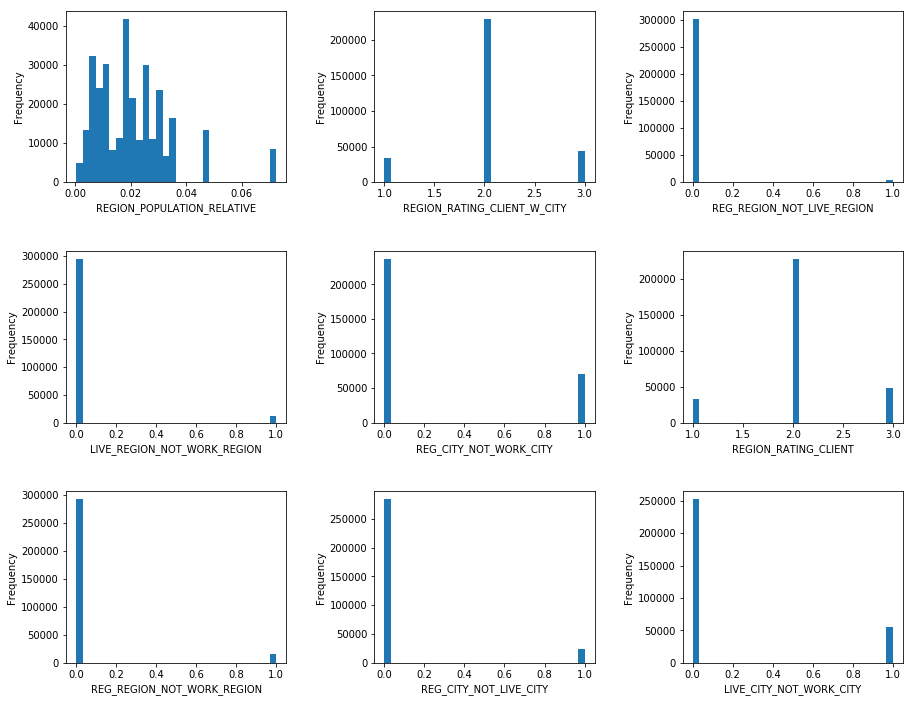

In [139]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,10):
    plt.subplot(3,3,i)
    application_train[region_num_9[i-1]].plot.hist(bins=30)
    plt.xlabel(region_num_9[i-1])
    plt.tight_layout

In [140]:
# High correlation between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY 

application_train[["REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","TARGET"]].corr()

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,TARGET
REGION_RATING_CLIENT,1.000000,0.950842,0.058899
REGION_RATING_CLIENT_W_CITY,0.950842,1.000000,0.060893
TARGET,0.058899,0.060893,1.000000


In [141]:
# High correlation between LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION 

application_train[["LIVE_REGION_NOT_WORK_REGION","REG_REGION_NOT_WORK_REGION","TARGET"]].corr()

,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,TARGET
LIVE_REGION_NOT_WORK_REGION,1.000000,0.860627,0.002819
REG_REGION_NOT_WORK_REGION,0.860627,1.000000,0.006942
TARGET,0.002819,0.006942,1.000000


In [518]:
# High correlation between LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY 

application_train[["LIVE_CITY_NOT_WORK_CITY","REG_CITY_NOT_WORK_CITY","TARGET"]].corr()

,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET
LIVE_CITY_NOT_WORK_CITY,1.000000,0.825575,0.032518
REG_CITY_NOT_WORK_CITY,0.825575,1.000000,0.050994
TARGET,0.032518,0.050994,1.000000


In [142]:
application_train[["REG_CITY_NOT_LIVE_CITY","REGION_POPULATION_RELATIVE","REG_REGION_NOT_LIVE_REGION","TARGET"]].corr()

,REG_CITY_NOT_LIVE_CITY,REGION_POPULATION_RELATIVE,REG_REGION_NOT_LIVE_REGION,TARGET
REG_CITY_NOT_LIVE_CITY,1.000000,-0.050499,0.339232,0.044395
REGION_POPULATION_RELATIVE,-0.050499,1.000000,0.002118,-0.037227
REG_REGION_NOT_LIVE_REGION,0.339232,0.002118,1.000000,0.005576
TARGET,0.044395,-0.037227,0.005576,1.000000


In [143]:
train_num_15 = ["SK_ID_CURR","AMT_CREDIT","DAYS_REGISTRATION","FLAG_WORK_PHONE","DAYS_BIRTH","DAYS_ID_PUBLISH","FLAG_CONT_MOBILE","HOUR_APPR_PROCESS_START","CNT_CHILDREN","DAYS_EMPLOYED","FLAG_MOBIL","FLAG_PHONE","AMT_INCOME_TOTAL","FLAG_EMP_PHONE","FLAG_EMAIL"]

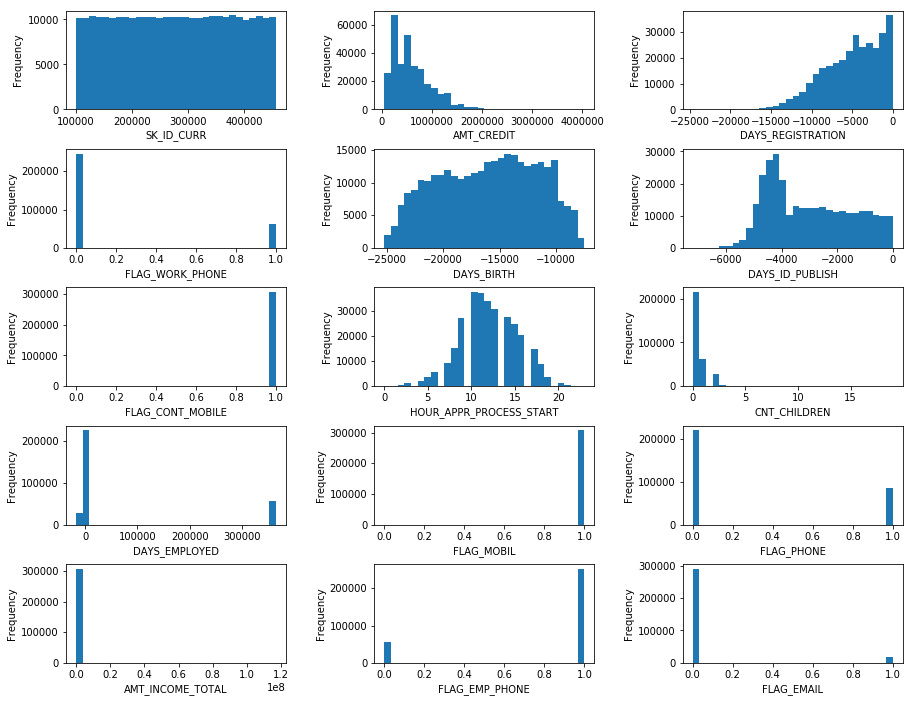

In [147]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,16):
    plt.subplot(5,3,i)
    application_train[train_num_15[i-1]].plot.hist(bins=30)
    plt.xlabel(train_num_15[i-1])
    plt.tight_layout

In [145]:
application_train["SK_ID_CURR"].nunique()

307511

In [146]:
application_train["FLAG_WORK_PHONE"].value_counts()

0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64

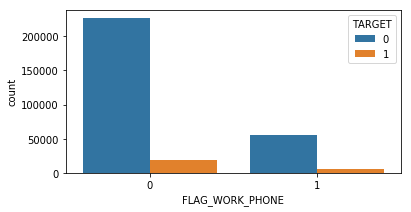

In [157]:
plt.figure(figsize=(6,3))
sns.countplot(x="FLAG_WORK_PHONE", hue="TARGET", data=application_train)
plt.show()

In [149]:
# Variable with low variance

application_train["FLAG_CONT_MOBILE"].value_counts()

1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

In [155]:
application_train[application_train["FLAG_CONT_MOBILE"] == 0]["TARGET"].value_counts()

0    529
1     45
Name: TARGET, dtype: int64

In [158]:
# Variable with low variance

application_train["FLAG_MOBIL"].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

In [159]:
application_train["AMT_INCOME_TOTAL"].value_counts().head()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
Name: AMT_INCOME_TOTAL, dtype: int64

In [163]:
application_train["AMT_INCOME_TOTAL"].nunique()

2548

In [164]:
application_train["FLAG_EMAIL"].value_counts()

0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

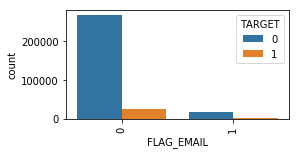

In [165]:
plt.figure(figsize=(4,2))
sns.countplot(x="FLAG_EMAIL", hue="TARGET", data=application_train)
plt.xticks(rotation="vertical")

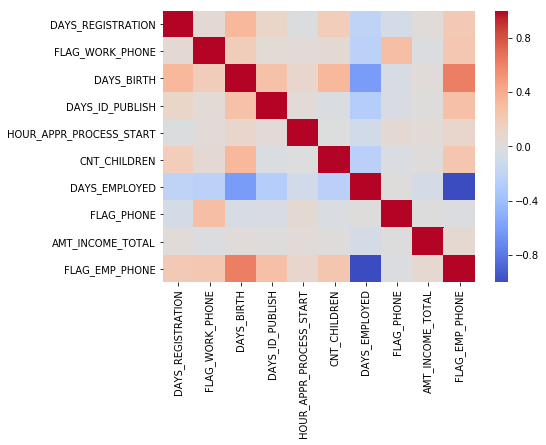

In [172]:
unwanted = {"SK_ID_CURR","AMT_CREDIT","FLAG_EMAIL","FLAG_MOBIL","FLAG_CONT_MOBILE"}
train_num_10 = [e for e in train_num_15 if e not in unwanted]
plt.figure(figsize=(7,5))
cor = application_train[train_num_10].corr()
sns.heatmap(cor,cmap="coolwarm")

In [174]:
application_train[["DAYS_BIRTH","DAYS_REGISTRATION","FLAG_EMP_PHONE","CNT_CHILDREN","TARGET"]].corr()

,DAYS_BIRTH,DAYS_REGISTRATION,FLAG_EMP_PHONE,CNT_CHILDREN,TARGET
DAYS_BIRTH,1.000000,0.331912,0.619888,0.330938,0.078239
DAYS_REGISTRATION,0.331912,1.000000,0.212361,0.183395,0.041975
FLAG_EMP_PHONE,0.619888,0.212361,1.000000,0.240714,0.045982
CNT_CHILDREN,0.330938,0.183395,0.240714,1.000000,0.019187
TARGET,0.078239,0.041975,0.045982,0.019187,1.000000


In [175]:
remove_num_list = ["AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY",
                   "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_QRT","DEF_60_CNT_SOCIAL_CIRCLE",
                   "OBS_60_CNT_SOCIAL_CIRCLE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5",
                   "FLAG_DOCUMENT_7","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10",
                  "FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14",
                  "FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18",
                  "FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","FLAG_CONT_MOBILE",
                  "FLAG_MOBIL","REGION_RATING_CLIENT","LIVE_CITY_NOT_WORK_CITY","LIVE_REGION_NOT_WORK_REGION"]

In [176]:
application_train.drop(remove_num_list,axis=1,inplace=True)
application_test.drop(remove_num_list,axis=1,inplace=True)

In [180]:
application_train.shape

(307511, 45)

In [181]:
# Removing new column created earlier "FLAG_DOCUMENT_ALL"

application_train.drop("FLAG_DOCUMENT_ALL",axis=1,inplace=True)
application_train.shape

(307511, 44)

In [182]:
application_test.shape

(48744, 43)

# Filling Missing Values for Numeric Variables

In [205]:
import statistics

In [187]:
# Training Data: Imputing missing values for EXT_SOURCE_3

fill_missing_train_1 = application_train["EXT_SOURCE_3"].mean()
application_train["EXT_SOURCE_3"].fillna(value=fill_missing_train_1,inplace=True)

# Test Data: Imputing missing values for EXT_SOURCE_3

fill_missing_test_1 = application_test["EXT_SOURCE_3"].mean()
application_test["EXT_SOURCE_3"].fillna(value=fill_missing_test_1,inplace=True)

In [189]:
# Training Data: Imputing missing values for AMT_REQ_CREDIT_BUREAU_YEAR

fill_missing_train_2 = application_train["AMT_REQ_CREDIT_BUREAU_YEAR"].median()
application_train["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(value=fill_missing_train_2,inplace=True)

# Test Data: Imputing missing values for AMT_REQ_CREDIT_BUREAU_YEAR

fill_missing_test_2 = application_test["AMT_REQ_CREDIT_BUREAU_YEAR"].median()
application_test["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(value=fill_missing_test_2,inplace=True)

In [209]:
# Training Data: Imputing missing values for OBS_30_CNT_SOCIAL_CIRCLE

fill_missing_train_3 = statistics.mode(application_train["OBS_30_CNT_SOCIAL_CIRCLE"])
application_train["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(value=fill_missing_train_3,inplace=True)

# Test Data: Imputing missing values for OBS_30_CNT_SOCIAL_CIRCLE

fill_missing_test_3 = statistics.mode(application_test["OBS_30_CNT_SOCIAL_CIRCLE"])
application_test["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(value=fill_missing_test_3,inplace=True)

In [191]:
# Training Data: Imputing missing values for AMT_ANNUITY

fill_missing_train_4 = application_train["AMT_ANNUITY"].mean()
application_train["AMT_ANNUITY"].fillna(value=fill_missing_train_4,inplace=True)

# Test Data: Imputing missing values for AMT_ANNUITY

fill_missing_test_4 = application_test["AMT_ANNUITY"].mean()
application_test["AMT_ANNUITY"].fillna(value=fill_missing_test_4,inplace=True)

In [207]:
# Training Data: Imputing missing values for DEF_30_CNT_SOCIAL_CIRCLE

fill_missing_train_5 = statistics.mode(application_train["DEF_30_CNT_SOCIAL_CIRCLE"])
application_train["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(value=fill_missing_train_5,inplace=True)

# Test Data: Imputing missing values for DEF_30_CNT_SOCIAL_CIRCLE

fill_missing_test_5 = statistics.mode(application_test["DEF_30_CNT_SOCIAL_CIRCLE"])
application_test["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(value=fill_missing_test_5,inplace=True)

In [219]:
# Training Data: Imputing missing values for EXT_SOURCE_2

fill_missing_train_6 = application_train["EXT_SOURCE_2"].mean()
application_train["EXT_SOURCE_2"].fillna(value=fill_missing_train_6,inplace=True)

# Test Data: Imputing missing values for EXT_SOURCE_2

fill_missing_test_6 = application_test["EXT_SOURCE_2"].mean()
application_test["EXT_SOURCE_2"].fillna(value=fill_missing_test_6,inplace=True)

In [194]:
# Training Data: Imputing missing values for AMT_GOODS_PRICE

fill_missing_train_7 = application_train["AMT_GOODS_PRICE"].mean()
application_train["AMT_GOODS_PRICE"].fillna(value=fill_missing_train_7,inplace=True)

In [210]:
# Training Data: Imputing missing values for CNT_FAM_MEMBERS

fill_missing_train_8 = statistics.mode(application_train["CNT_FAM_MEMBERS"])
application_train["CNT_FAM_MEMBERS"].fillna(value=fill_missing_train_8,inplace=True)

In [211]:
# Training Data: Imputing missing values for DAYS_LAST_PHONE_CHANGE

fill_missing_train_9 = statistics.mode(application_train["DAYS_LAST_PHONE_CHANGE"])
application_train["DAYS_LAST_PHONE_CHANGE"].fillna(value=fill_missing_train_9,inplace=True)

In [216]:
sorted(application_train.isnull().sum(),reverse=True)[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [220]:
sorted(application_test.isnull().sum(),reverse=True)[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Creating Dummy Variables for Categorical Fields

In [261]:
# Creating dummy variables for categorical columns - Training Data

cat_var_list = application_train.select_dtypes(include="object").columns
dummies = pd.get_dummies(application_train[cat_var_list],drop_first=True)

# Adding dummy variables into training data and removing origincal categorical columns

application_train_final = pd.concat([application_train,dummies],axis=1)
application_train_final.shape

(307511, 158)

In [262]:
# Removing original origincal categorical fields - Training Data

application_train_final.drop(cat_var_list,axis=1,inplace=True)
application_train_final.shape

(307511, 146)

In [263]:
# Creating dummy variables for categorical columns - Test Data

cat_var_list_test = application_test.select_dtypes(include="object").columns
dummies = pd.get_dummies(application_test[cat_var_list_test],drop_first=True)

# Adding dummy variables into test data and removing origincal categorical columns

application_test_final = pd.concat([application_test,dummies],axis=1)
application_test_final.shape

(48744, 154)

In [264]:
# Removing original origincal categorical fields - Test Data

application_test_final.drop(cat_var_list_test,axis=1,inplace=True)
application_test_final.shape

(48744, 142)

In [265]:
train_cols = application_train_final.columns
test_cols = application_test_final.columns
train_test_cols_diff = [e for e in train_cols if e not in test_cols]

In [266]:
application_train_final["CODE_GENDER_XNA"].sum()

4

In [267]:
application_train_final["NAME_INCOME_TYPE_Maternity leave"].sum()

5

In [268]:
application_train_final["NAME_FAMILY_STATUS_Unknown"].sum()

2

In [269]:
application_train_final.select_dtypes(include="object").head(3)

""
0
1
2


In [270]:
application_test_final.select_dtypes(include="object").head(3)

""
0
1
2


In [271]:
# Removing 4 extra fields from training data (to match no. of independent variables in training and test data)

application_train_final.drop(train_test_cols_diff,axis=1,inplace=True)

In [272]:
application_train_final.shape

(307511, 142)

In [273]:
train_target = application_train["TARGET"]

# Building Models

In [256]:
# Import libraries

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.pipeline import make_pipeline

In [274]:
# Making a train/test split using 30% as test size

X_train, X_test, y_train, y_test = train_test_split(application_train_final, train_target, test_size=0.30, random_state=101)

In [282]:
# Fit to data and predict using pipelined scaling, GNB and PCA.

model_gnb = make_pipeline(StandardScaler(), PCA(), GaussianNB())
model_gnb.fit(X_train, y_train)
pred_test = model_gnb.predict(X_test)

In [283]:
print(metrics.roc_auc_score(y_test,pred_test))

0.5398880784774099


# Logistic Regression Model

In [284]:
from sklearn.linear_model import LogisticRegression

In [285]:
# Fit to data and predict using pipelined scaling, Logistic Regression and PCA.

model_logit = make_pipeline(StandardScaler(), PCA(), LogisticRegression())
model_logit.fit(X_train, y_train)
pred_test_logit = model_logit.predict(X_test)

In [286]:
print(metrics.roc_auc_score(y_test,pred_test_logit))

0.5052243425152783


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fit to data and predict using pipelined scaling, random forest and PCA.


# EDA - Bureau.csv data

In [585]:
bureau = pd.read_csv("bureau.csv")

In [586]:
bureau.shape

(1716428, 17)

In [587]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [589]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [590]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [591]:
bureau.drop(["SK_ID_CURR","SK_ID_BUREAU"],axis=1).corr()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
DAYS_CREDIT,1.000000,-0.027266,0.225682,0.875359,-0.014724,-0.030460,0.050883,0.135397,0.025140,-0.000383,0.688771,0.005676
CREDIT_DAY_OVERDUE,-0.027266,1.000000,-0.007352,-0.008637,0.001249,0.002756,-0.003292,-0.002355,-0.000345,0.090951,-0.018461,-0.000339
DAYS_CREDIT_ENDDATE,0.225682,-0.007352,1.000000,0.248825,0.000577,0.113683,0.055424,0.081298,0.095421,0.001077,0.248525,0.000475
DAYS_ENDDATE_FACT,0.875359,-0.008637,0.248825,1.000000,0.000999,0.012017,0.059096,0.019609,0.019476,-0.000332,0.751294,0.006274
AMT_CREDIT_MAX_OVERDUE,-0.014724,0.001249,0.000577,0.000999,1.000000,0.001523,0.081663,0.014007,-0.000112,0.015036,-0.000749,0.001578
CNT_CREDIT_PROLONG,-0.030460,0.002756,0.113683,0.012017,0.001523,1.000000,-0.008345,-0.001366,0.073805,0.000002,0.017864,-0.000465
AMT_CREDIT_SUM,0.050883,-0.003292,0.055424,0.059096,0.081663,-0.008345,1.000000,0.683419,0.003756,0.006342,0.104629,0.049146
AMT_CREDIT_SUM_DEBT,0.135397,-0.002355,0.081298,0.019609,0.014007,-0.001366,0.683419,1.000000,-0.018215,0.008046,0.141235,0.025507
AMT_CREDIT_SUM_LIMIT,0.025140,-0.000345,0.095421,0.019476,-0.000112,0.073805,0.003756,-0.018215,1.000000,-0.000687,0.046028,0.004392
AMT_CREDIT_SUM_OVERDUE,-0.000383,0.090951,0.001077,-0.000332,0.015036,0.000002,0.006342,0.008046,-0.000687,1.000000,0.003528,0.000344


In [594]:
bur_num_colnames = bureau.select_dtypes(exclude="object").columns

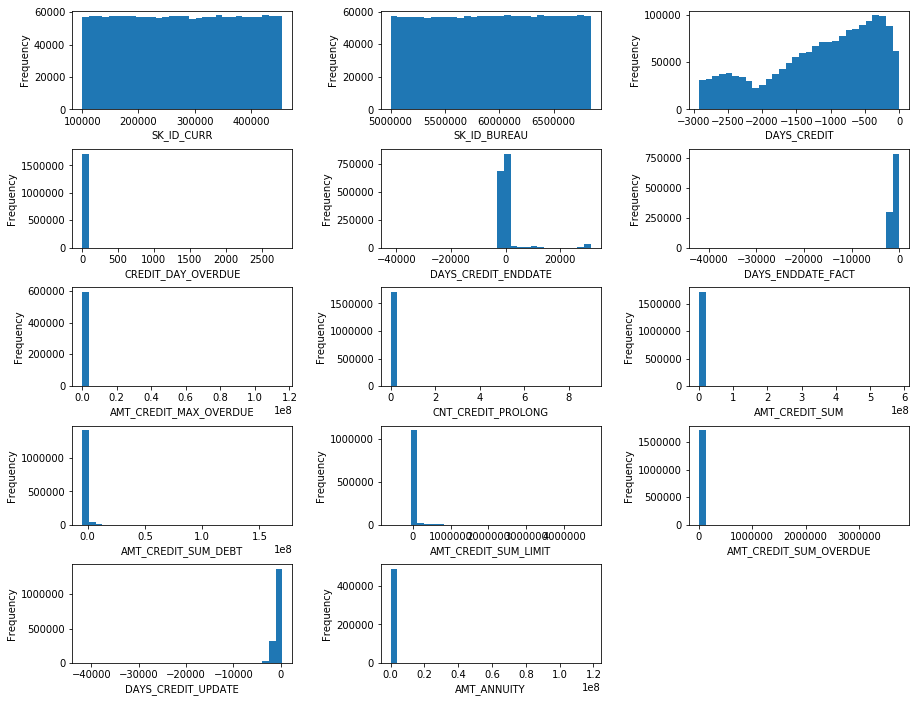

In [595]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,15):
    plt.subplot(5,3,i)
    bureau[bur_num_colnames[i-1]].plot.hist(bins=30)
    plt.xlabel(bur_num_colnames[i-1])
    plt.tight_layout

In [596]:
bureau["SK_ID_CURR"].nunique()

305811

In [600]:
len(bureau["SK_ID_CURR"])

1716428

In [601]:
bureau["SK_ID_BUREAU"].nunique()

1716428

In [604]:
bureau["CREDIT_DAY_OVERDUE"].value_counts().head()

0     1712211
30        311
60        126
13        103
8         103
Name: CREDIT_DAY_OVERDUE, dtype: int64

In [606]:
bureau["DAYS_CREDIT_ENDDATE"].value_counts().head()

 0.0     883
 3.0     845
-7.0     837
 1.0     830
-14.0    787
Name: DAYS_CREDIT_ENDDATE, dtype: int64

In [607]:
bureau["DAYS_CREDIT_ENDDATE"].nunique()

14096

In [608]:
bureau["DAYS_CREDIT_ENDDATE"].describe()

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

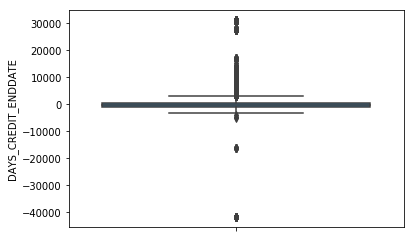

In [621]:
sns.boxplot(y=bureau["DAYS_CREDIT_ENDDATE"])

In [620]:
bureau["DAYS_CREDIT_ENDDATE"].quantile([0.01,0.99])

0.01    -2571.0
0.99    31029.0
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [622]:
bureau["DAYS_ENDDATE_FACT"].value_counts().head()

-329.0    811
-273.0    794
-301.0    791
-91.0     785
-84.0     783
Name: DAYS_ENDDATE_FACT, dtype: int64

In [623]:
bureau["DAYS_ENDDATE_FACT"].nunique()

2917

In [624]:
bureau["AMT_CREDIT_MAX_OVERDUE"].value_counts().head()

0.0       470650
1440.0       688
225.0        405
45.0         377
4.5          315
Name: AMT_CREDIT_MAX_OVERDUE, dtype: int64

In [626]:
bureau["AMT_CREDIT_MAX_OVERDUE"].value_counts().sum()-470650

121290

In [632]:
bureau["AMT_CREDIT_MAX_OVERDUE"].nunique()

68251

In [633]:
bureau["CNT_CREDIT_PROLONG"].value_counts().head()

0    1707314
1       7620
2       1222
3        191
4         54
Name: CNT_CREDIT_PROLONG, dtype: int64

In [630]:
bureau[bureau["CNT_CREDIT_PROLONG"] != 0]["SK_ID_CURR"].nunique()

8796

In [631]:
bureau[bureau["CNT_CREDIT_PROLONG"] == 0]["SK_ID_CURR"].nunique()

305499

In [634]:
bureau["AMT_CREDIT_SUM"].value_counts().head()

0.0         66582
225000.0    57608
135000.0    50195
450000.0    37156
90000.0     36940
Name: AMT_CREDIT_SUM, dtype: int64

In [635]:
bureau["AMT_CREDIT_SUM"].nunique()

236708

In [636]:
bureau["AMT_CREDIT_SUM_DEBT"].value_counts().head()

 0.0         1016434
 4.5             653
-450.0           543
 135000.0        344
 90000.0         320
Name: AMT_CREDIT_SUM_DEBT, dtype: int64

In [640]:
bureau["AMT_CREDIT_SUM_LIMIT"].value_counts().head()

0.0         1050142
135000.0       2178
4500.0         1474
45000.0        1335
90000.0         974
Name: AMT_CREDIT_SUM_LIMIT, dtype: int64

In [641]:
bureau[["AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_DEBT","AMT_CREDIT_SUM"]].corr()

,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM
AMT_CREDIT_SUM_LIMIT,1.000000,-0.018215,0.003756
AMT_CREDIT_SUM_DEBT,-0.018215,1.000000,0.683419
AMT_CREDIT_SUM,0.003756,0.683419,1.000000


In [638]:
bureau["AMT_CREDIT_SUM_OVERDUE"].value_counts().head()

0.0     1712270
4.5         301
9.0         107
13.5         81
18.0         72
Name: AMT_CREDIT_SUM_OVERDUE, dtype: int64

In [639]:
bureau[["AMT_CREDIT_SUM_OVERDUE", "AMT_CREDIT_MAX_OVERDUE"]].corr()

,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_MAX_OVERDUE
AMT_CREDIT_SUM_OVERDUE,1.000000,0.015036
AMT_CREDIT_MAX_OVERDUE,0.015036,1.000000


In [642]:
bureau["CREDIT_TYPE"].value_counts().head()

Consumer credit    1251615
Credit card         402195
Car loan             27690
Mortgage             18391
Microloan            12413
Name: CREDIT_TYPE, dtype: int64

In [643]:
bureau["DAYS_CREDIT_UPDATE"].value_counts().head()

-7     18503
-8     18462
-11    16975
-15    16870
-12    16827
Name: DAYS_CREDIT_UPDATE, dtype: int64

In [644]:
bureau["AMT_ANNUITY"].value_counts().head()

0.0        256915
4500.0       5182
13500.0      3147
22500.0      2502
9000.0       1725
Name: AMT_ANNUITY, dtype: int64

In [646]:
bureau["CREDIT_ACTIVE"].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [658]:
bureau["CREDIT_CURRENCY"].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [659]:
bureau[bureau["CREDIT_CURRENCY"] != "currency 1"]["SK_ID_CURR"].nunique()

1110

In [660]:
bureau["CREDIT_TYPE"].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

In [650]:
bureau2 = bureau.drop(["AMT_CREDIT_MAX_OVERDUE","AMT_ANNUITY"],axis=1)

In [652]:
bureau2.shape

(1716428, 15)

In [653]:
bureau2.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE       105553
DAYS_ENDDATE_FACT         633653
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                13
AMT_CREDIT_SUM_DEBT       257669
AMT_CREDIT_SUM_LIMIT      591780
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
dtype: int64

In [655]:
bureau2["DAYS_CREDIT_ENDDATE"].describe()

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [657]:
bureau2["DAYS_CREDIT_ENDDATE"].median()

-330.0

# EDA - Bureau_Balance.csv data

In [661]:
bureau_bal = pd.read_csv("bureau_balance.csv")

In [662]:
bureau_bal.shape

(27299925, 3)

In [663]:
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [664]:
bureau_bal["STATUS"].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [666]:
bureau_bal["MONTHS_BALANCE"].value_counts().head()

-1    622601
-2    619243
-3    615080
 0    610965
-4    609138
Name: MONTHS_BALANCE, dtype: int64

In [667]:
bureau_bal["MONTHS_BALANCE"].nunique()

97

In [671]:
bureau_bal = pd.get_dummies(bureau_bal,columns=["STATUS"])

In [678]:
bureau_bal.shape

(27299925, 10)

In [679]:
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


In [684]:
bureau_bal2 = bureau_bal.groupby(by = "SK_ID_BUREAU",as_index=False).sum()

In [690]:
bureau_bal2.shape

(817395, 10)

In [691]:
bureau_bal2.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5001709,-4656,0,0,0,0,0,0,86,11
1,5001710,-3403,5,0,0,0,0,0,48,30
2,5001711,-6,3,0,0,0,0,0,0,1
3,5001712,-171,10,0,0,0,0,0,9,0
4,5001713,-231,0,0,0,0,0,0,0,22


In [689]:
bureau_bal2["SK_ID_BUREAU"].nunique()

817395

In [688]:
bureau_bal["SK_ID_BUREAU"].nunique()

817395

# EDA - credit_card_balance.csv data

In [1]:
c_c_bal = pd.read_csv("credit_card_balance.csv")

NameError: name 'pd' is not defined

In [693]:
c_c_bal.shape

(3840312, 23)

In [694]:
c_c_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
